# <center><span style="color:green">Using Spark (pyspark) for MHealth dataset</span></center>

# <span style="color:red">Create spark instance and configure pyspark</span>

In [1]:
from pyspark import SparkConf, SparkContext
conf = SparkConf().setMaster("local").setAppName("RatingsHistogram")
sc = SparkContext(conf = conf)

# <span style="color:red">Load the dataset</span>

In [2]:
data = sc.textFile("dataset/dataset_nh.csv")
print("Total instances: ",data.count())

Total instances:  1215745


In [3]:
data.take(5)

['-9.8184,0.009970999999999999,0.29563,0.0041863,0.0041863,2.1849,-9.6967,0.6307699999999999,0.1039,-0.8405299999999999,-0.68762,-0.37,-0.36327,0.29963,-8.6499,-4.5781,0.18775999999999998,-0.44902,-1.0103,0.034483,-2.35,-1.6102,-0.030899,0',
 '-9.8489,0.52404,0.37348000000000003,0.0041863,0.016745,2.3876,-9.508,0.68389,0.08534299999999999,-0.83865,-0.6836899999999999,-0.19799,-0.18151,0.58298,-8.6275,-4.3198,0.023594999999999998,-0.44902,-1.0103,0.034483,-2.1632,-0.88254,0.32656999999999997,0',
 '-9.6602,0.18185,0.43742,0.016745,0.037676999999999995,2.4086,-9.5674,0.68113,0.08534299999999999,-0.83865,-0.6836899999999999,-0.37417,0.18723,0.43851,-8.5055,-4.2772,0.27571999999999997,-0.44902,-1.0103,0.034483,-1.6175,-0.16562000000000002,-0.030693,0',
 '-9.6507,0.21422,0.24033000000000002,0.07954,0.11722,2.1814,-9.4301,0.5503100000000001,0.08534299999999999,-0.83865,-0.6836899999999999,-0.017271,0.18366,0.57571,-8.6279,-4.3163,0.36751999999999996,-0.45686000000000004,-1.0082,0.025862,-1.07

# <span style="color:red">Analyze the target features</span>

In [4]:
target = data.map(lambda x: x.split(",")[23])
result = target.countByValue()
print("Target count",result)

Target count defaultdict(<class 'int'>, {'0': 872550, '1': 30720, '2': 30720, '3': 30720, '4': 30720, '6': 28315, '7': 29441, '8': 29337, '9': 30720, '10': 30720, '11': 30720, '12': 10342, '5': 30720})


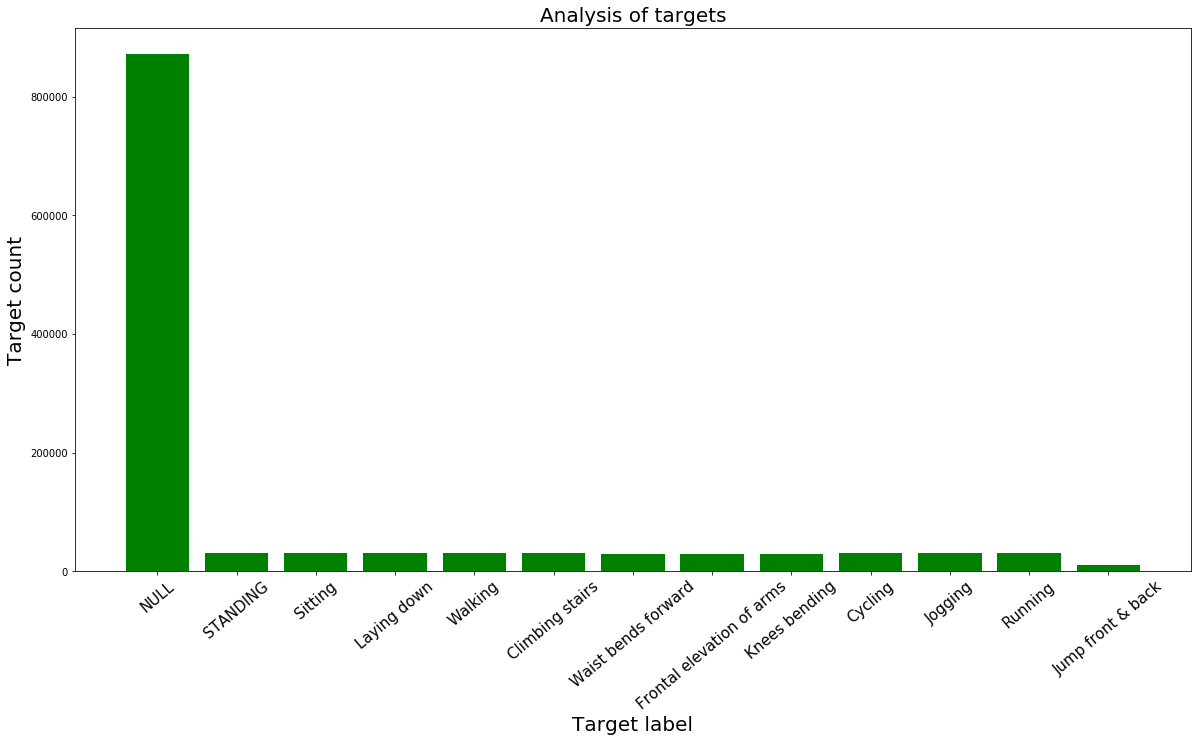

In [5]:
import matplotlib.pyplot as plt
import collections
import numpy as np

keys=list(result.keys())
for i in range(len(keys)):
          keys[i]=int(keys[i])
values=result.values()
r=dict(zip(keys, values))
r = collections.OrderedDict(sorted(r.items()))

label=['NULL','STANDING','Sitting','Laying down','Walking','Climbing stairs','Waist bends forward',
       'Frontal elevation of arms','Knees bending','Cycling','Jogging','Running','Jump front & back']
index=np.arange(len(label))
plt.figure(figsize=(20, 10))
plt.legend()
plt.bar(r.keys(),r.values(), color='g')
plt.xlabel('Target label',fontsize=20)
plt.xticks(index, label, fontsize=15,rotation=40)
plt.ylabel('Target count',fontsize=20)
plt.title('Analysis of targets',fontsize=20)
plt.show()

# <span style="color:red">Removing Null class</span>

Target count defaultdict(<class 'int'>, {'1': 30720, '2': 30720, '3': 30720, '4': 30720, '6': 28315, '7': 29441, '8': 29337, '9': 30720, '10': 30720, '11': 30720, '12': 10342, '5': 30720})


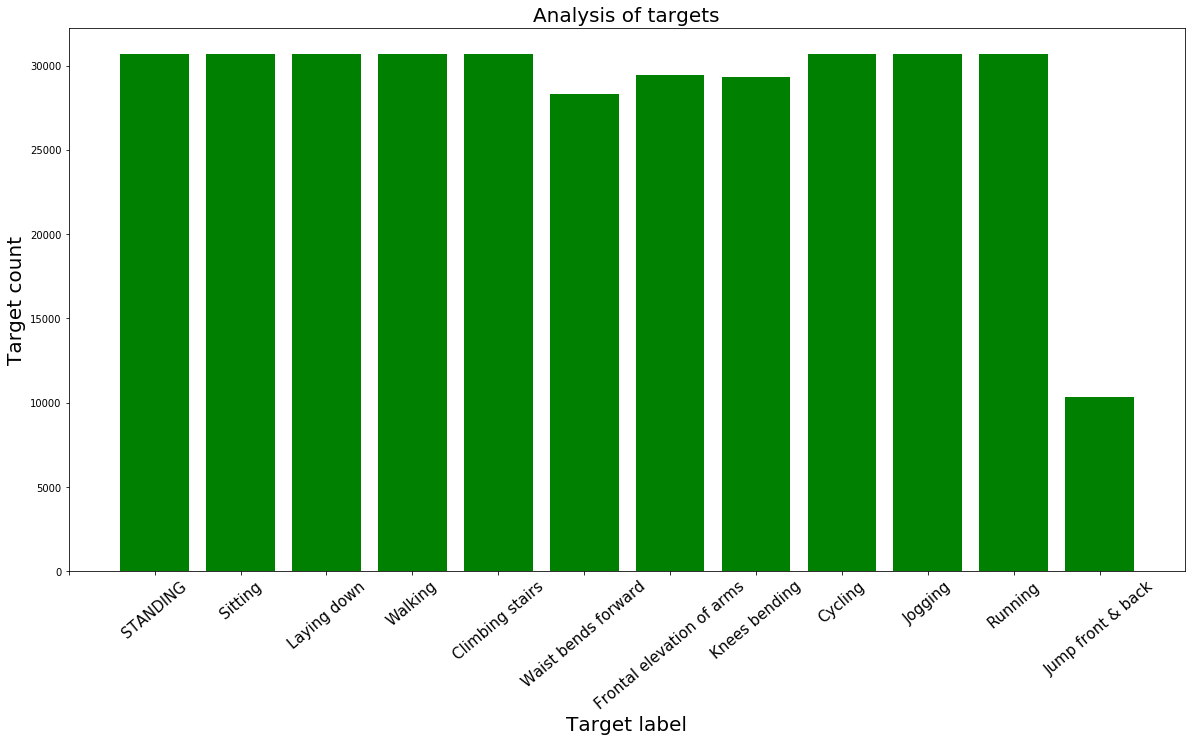

After filtering Number of instances:  343195


In [6]:
data_filtered = data.filter(lambda x: int(x.split(",")[23])!=0)
data_filtered.take(5)

target_fil = data_filtered.map(lambda x: x.split(",")[23])
result = target_fil.countByValue()
print("Target count",result)

keys=list(result.keys())
for i in range(len(keys)):
          keys[i]=int(keys[i])
values=result.values()
r=dict(zip(keys, values))
r = collections.OrderedDict(sorted(r.items()))

label=['','STANDING','Sitting','Laying down','Walking','Climbing stairs','Waist bends forward',
       'Frontal elevation of arms','Knees bending','Cycling','Jogging','Running','Jump front & back']
index=np.arange(len(label))
plt.figure(figsize=(20, 10))
plt.legend()
plt.bar(r.keys(),r.values(), color='g')
plt.xlabel('Target label',fontsize=20)
plt.xticks(index, label, fontsize=15,rotation=40)
plt.ylabel('Target count',fontsize=20)
plt.title('Analysis of targets',fontsize=20)
plt.show()
print("After filtering Number of instances: ",data_filtered.count())

# <span style="color:red">Collect the data from RDD and save it to CSV file</span>

In [9]:
data_collected=data_filtered.map(lambda x: x.split(",")).collect()

import pandas as pd
df=pd.DataFrame(data_collected)
df.to_csv(columns=None,header=False,index=False,path_or_buf="dataset/dataset_filtered.csv")

# <span style="color:red">Alanyzing the ECG for Running and Standing action</span>

In [10]:
import pandas as pd
sub1 = pd.read_csv('dataset/mHealth_subject1.log',sep="\t",header=None)
sub2 = pd.read_csv('dataset/mHealth_subject2.log',sep="\t",header=None)
ac11=sub1[sub1[23]==11]
ac1=sub1[sub1[23]==1]

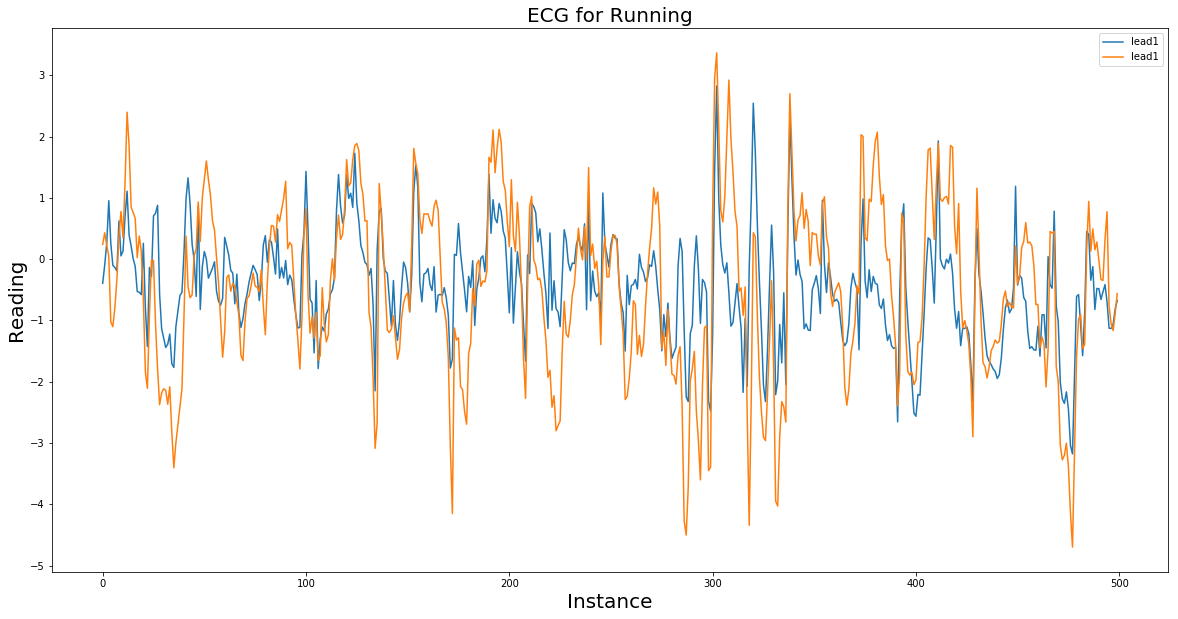

In [11]:
l=ac11[1000:1500]
plt.figure(figsize=(20, 10))
plt.plot([i for i in range(len(l))],l[3],label="lead1")
plt.plot([i for i in range(len(l))],l[4],label="lead1")
plt.title("ECG for Running",fontsize=20)
plt.xlabel("Instance",fontsize=20)
plt.ylabel("Reading",fontsize=20)
plt.legend()
plt.show()

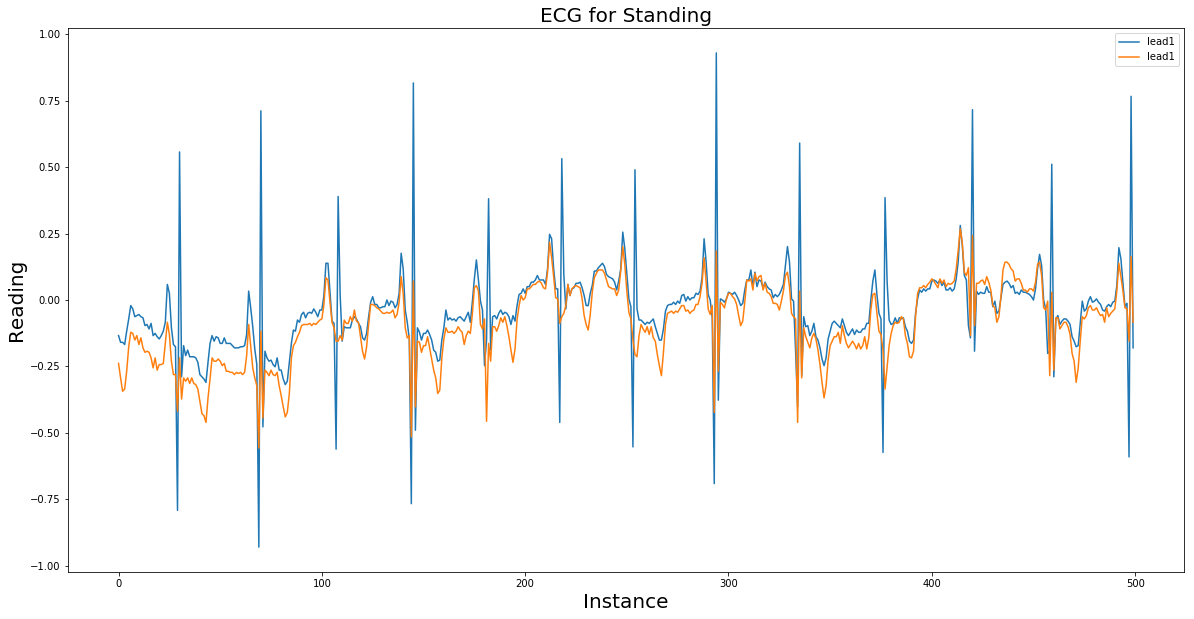

In [12]:
l=ac1[1000:1500]
plt.figure(figsize=(20, 10))
plt.plot([i for i in range(len(l))],l[3],label="lead1")
plt.plot([i for i in range(len(l))],l[4],label="lead1")
plt.title("ECG for Standing",fontsize=20)
plt.xlabel("Instance",fontsize=20)
plt.ylabel("Reading",fontsize=20)
plt.legend()
plt.show()

# <span style="color:red">Analyzing the activity pattern of subjects</span>

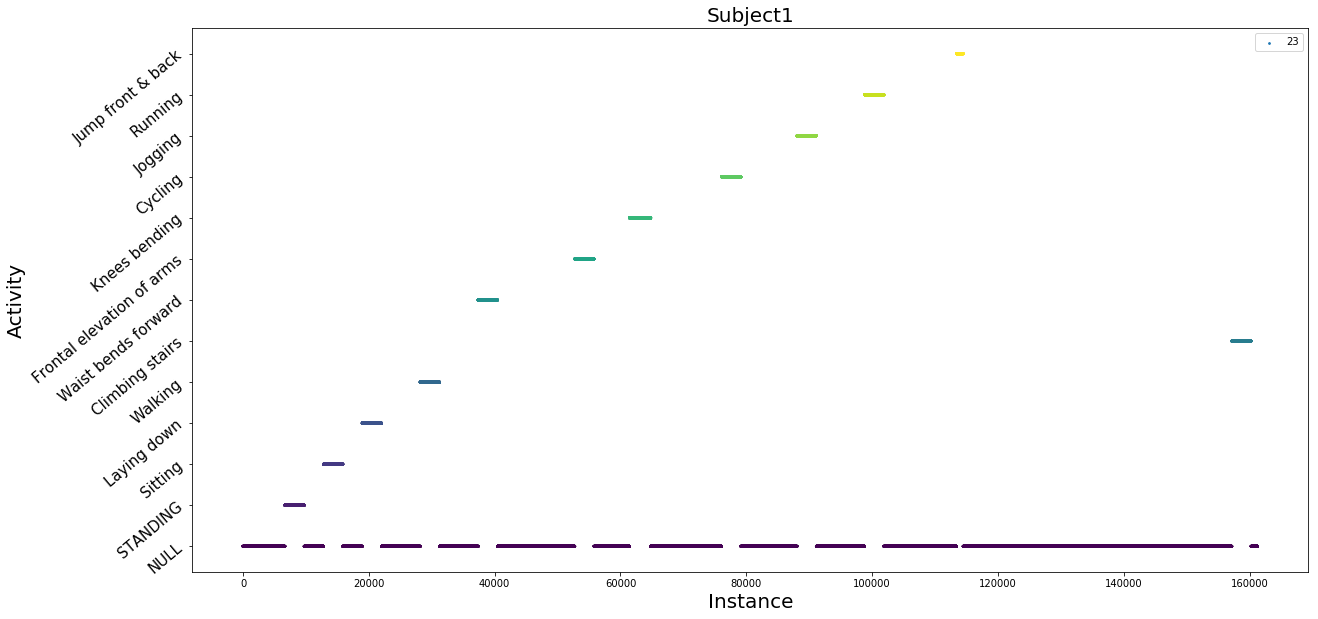

In [13]:
plt.figure(figsize=(20, 10))
label=['NULL','STANDING','Sitting','Laying down','Walking','Climbing stairs','Waist bends forward',
       'Frontal elevation of arms','Knees bending','Cycling','Jogging','Running','Jump front & back']
plt.yticks(index, label, fontsize=15,rotation=40)
plt.scatter([i for i in range(len(sub1))],sub1[23], s = 3, c=sub1[23])
plt.title("Subject1",fontsize=20)
plt.xlabel("Instance",fontsize=20)
plt.ylabel("Activity",fontsize=20)
plt.legend()
plt.show()

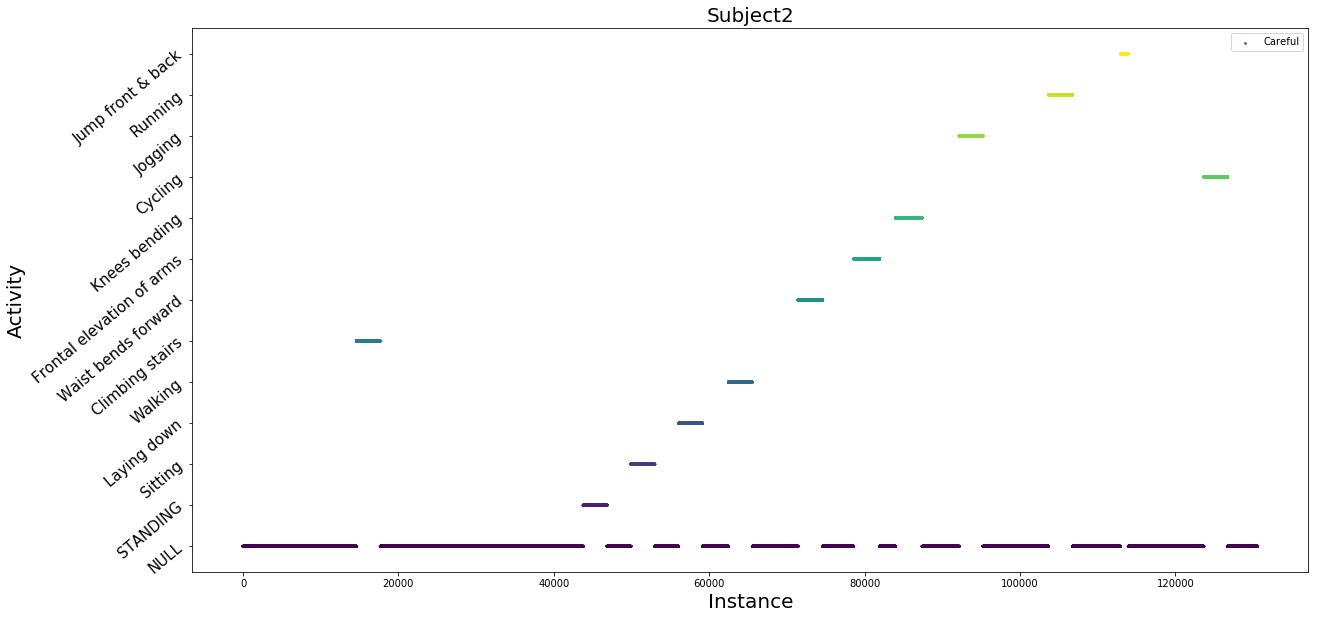

In [14]:
plt.figure(figsize=(20, 10))
label=['NULL','STANDING','Sitting','Laying down','Walking','Climbing stairs','Waist bends forward',
       'Frontal elevation of arms','Knees bending','Cycling','Jogging','Running','Jump front & back']
plt.yticks(index, label, fontsize=15,rotation=40)
plt.scatter([i for i in range(len(sub2))],sub2[23], s = 3, c=sub2[23], label = 'Careful')
plt.title("Subject2",fontsize=20)
plt.xlabel("Instance",fontsize=20)
plt.ylabel("Activity",fontsize=20)
plt.legend()
plt.show()